# Binning

In [0]:
# mglearn インストールができていなければ、こちらを実行
# !pip install mglearn

<function matplotlib.pyplot.show>

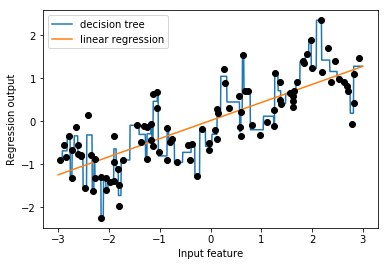

In [0]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

# データセット作成　
# make_wave:mglearnというライブラリで自動生成した回帰用のサンプルデータ
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

# 決定木のモデルを生成・予測する
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='decision tree')

# 線形回帰モデルを生成・予測する
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

# 元データをドットプロットで一緒に表示する
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

plt.show

In [0]:
# binの枠を作成する（データを11箇所で区切って、10個のbinを作成している）
bins = np.linspace(-3, 3, 11)
print('bins: {}'.format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [0]:
# 変数Xをbinに入れる
which_bin = np.digitize(X, bins=bins)
for i in range(5):
    print('{} => {}'.format(X[i],which_bin[i]))

[-0.75275929] => [4]
[2.70428584] => [10]
[1.39196365] => [8]
[0.59195091] => [6]
[-2.06388816] => [2]


In [0]:
# One-Hotエンコーディングする
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print('X_binned.shape: {}'.format(X_binned.shape))

X_binned.shape: (100, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
print(X_binned)

<function matplotlib.pyplot.show>

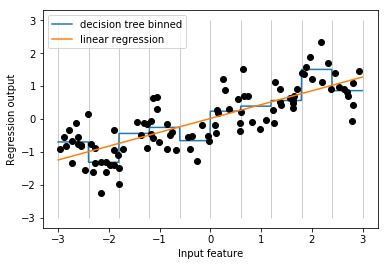

In [0]:
# lineもbin単位に変換する
line_binned = encoder.transform(np.digitize(line, bins=bins))

# 決定木をbin単位で作成予測する
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')

# 線形回帰直線を重ねる
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

# 元データをドットプロットで一緒に表示する
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

plt.show

<function matplotlib.pyplot.show>

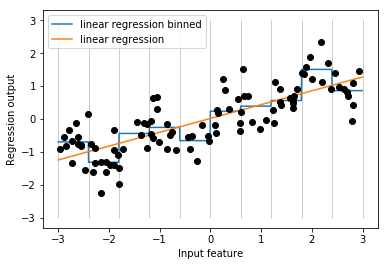

In [0]:
# 因みに…make_waveデータだと、線形回帰もbin単位で行っても同じ形になってしまう。
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

plt.show